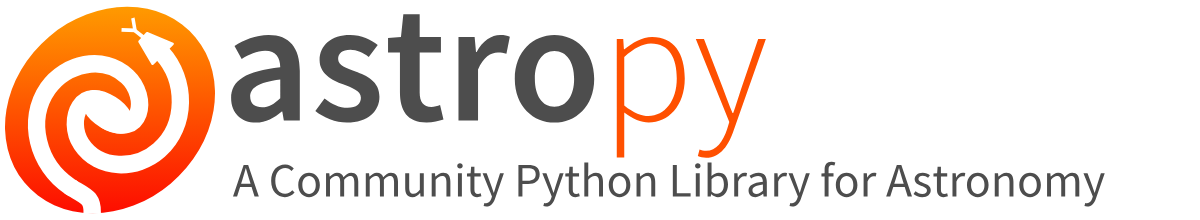

# PYTHON : Visualize Astronomical Data Cube Through Animation
## Tutorial Objective-1: How To Visualize Data Cube 2D Image at Each Spectral(Z) Axis?
## Tutorial Objective-2: How To Visualize Data Cube  1D Spectra at Each (X,Y) Spaxel?

## Download Data cube: https://magrathea.sdss.org/marvin/
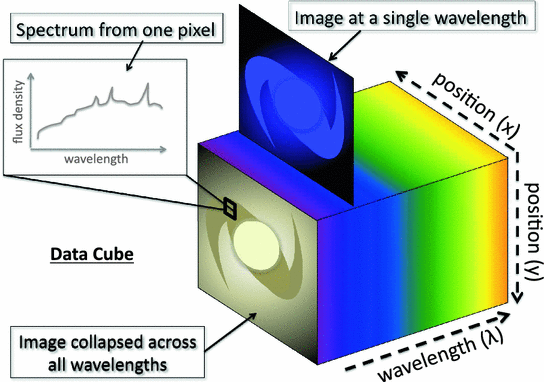

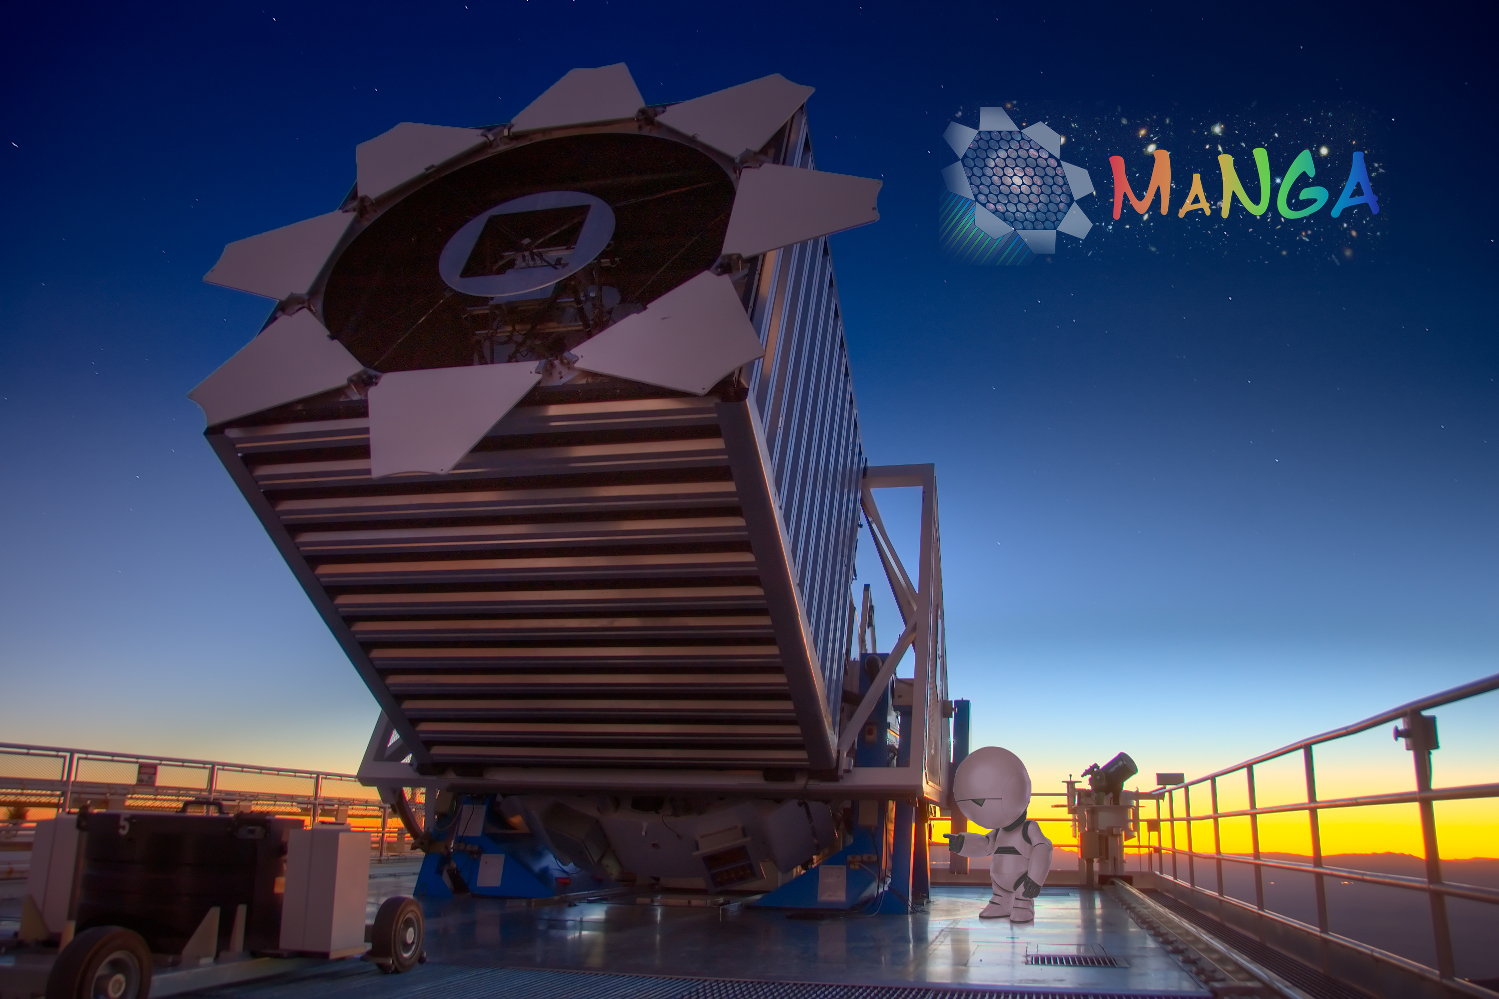

In [3]:
# import library
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


In [4]:
cube=fits.open('manga-12514-9101-LOGCUBE.fits') # open data cube
# data cube information
cube.info()

Filename: manga-12514-9101-LOGCUBE.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (62, 62, 4563)   float32   
  2  IVAR          1 ImageHDU        17   (62, 62, 4563)   float32   
  3  MASK          1 ImageHDU        17   (62, 62, 4563)   int32   
  4  LSFPOST       1 ImageHDU        11   (62, 62, 4563)   float32   
  5  LSFPRE        1 ImageHDU        11   (62, 62, 4563)   float32   
  6  WAVE          1 ImageHDU         9   (4563,)   float64   
  7  SPECRES       1 ImageHDU         9   (4563,)   float64   
  8  SPECRESD      1 ImageHDU         9   (4563,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (4563,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (4563,)   float64   
 11  OBSINFO       1 BinTableHDU    148   9R x 65C   [26A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 13A

In [12]:
# first extract 2d image  at single spectra z axis
img=cube[1].data
img.shape

(4563, 62, 62)

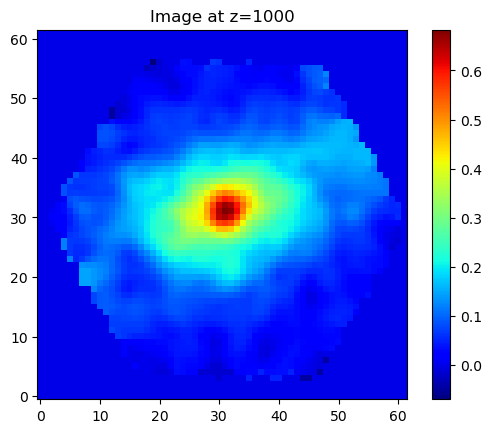

In [28]:
# plot 2d image  at single spectra z axis
              # img[z,all y, x spaxel]
plt.imshow(img[1000,:,:],cmap='jet',origin='lower')
plt.title('Image at z=1000')
plt.colorbar()
plt.show()

  0%|▎                                                                               | 20/4563 [00:03<12:42,  5.95it/s]C:\Users\JPrakash\AppData\Local\Temp\ipykernel_23128\2264926135.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
100%|██████████████████████████████████████████████████████████████████████████████| 4563/4563 [13:18<00:00,  5.71it/s]


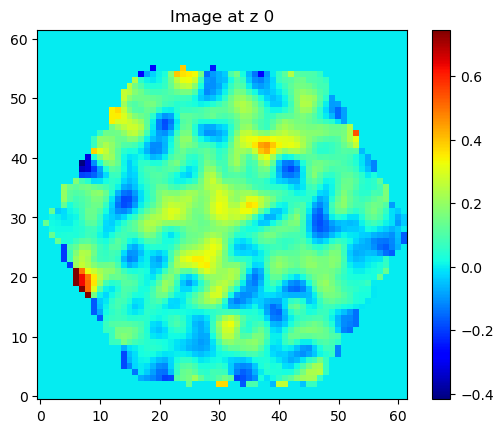

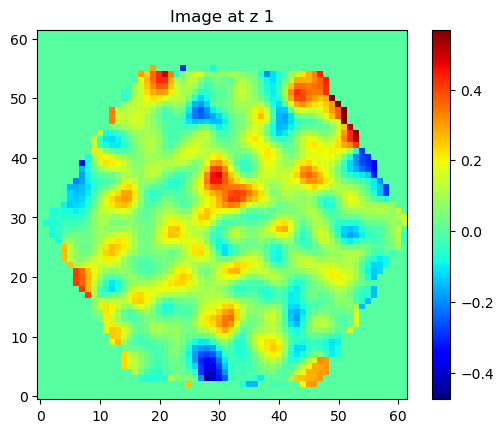

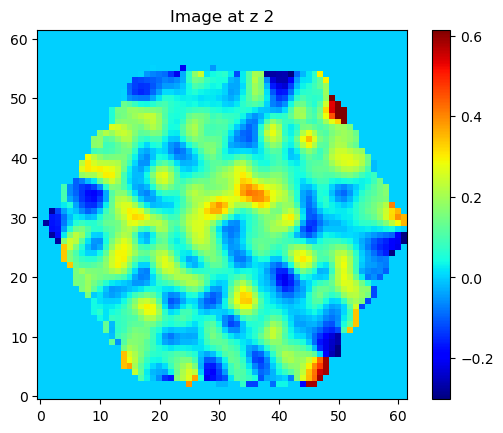

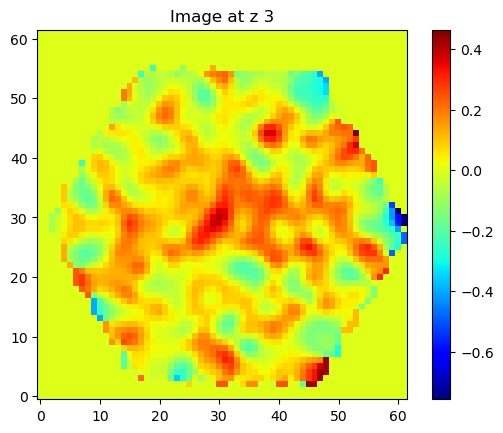

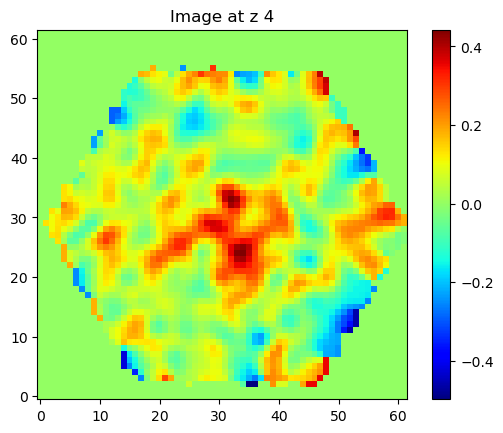

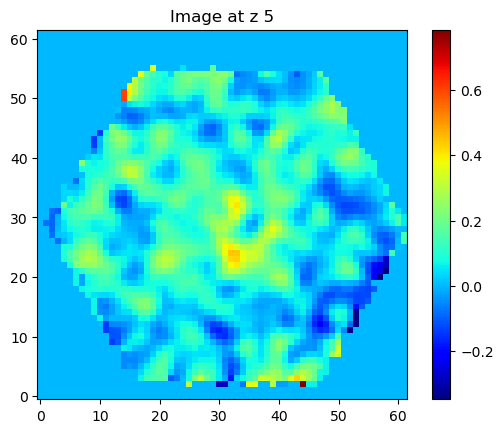

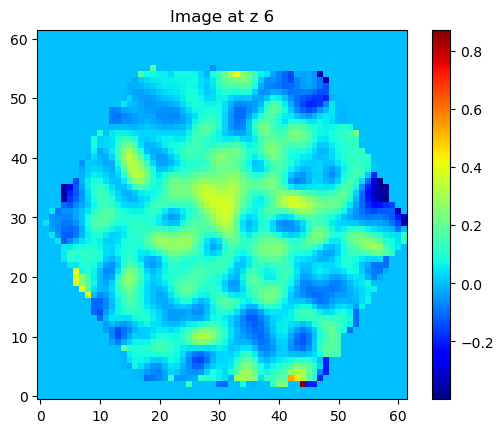

In [ ]:
# lets extract all 2d images along spetral axis

for i in tqdm(range(0,4563)):
    plt.figure()
    plt.imshow(img[i,:,:],cmap='jet',origin='lower')
    plt.title('Image at z {}'.format(i))
    plt.colorbar()
    plt.savefig(f'Data_cube_image/image_{i}.png')
    

In [5]:
import glob  # used roi read all png file
import imageio.v2 as imageio  # used to make animation

In [9]:
#  collect all png file
images_file=glob.glob(f'Data_cube_image/*.png')


In [11]:
# read each image from file and store them in a list
image=[]
for  j in tqdm(images_file):
    image.append(imageio.imread(j))

100%|██████████████████████████████████████████████████████████████████████████████| 4563/4563 [00:54<00:00, 83.86it/s]


In [13]:
# create animation and save into gif format
imageio.mimsave('Data_cube_image_visln.gif',image,duration=5)
print('my animation is ready')

my animation is ready


# Tutorial Objective-2: How To Visualize Data Cube 1D Spectra at Each (X,Y) Spaxel?

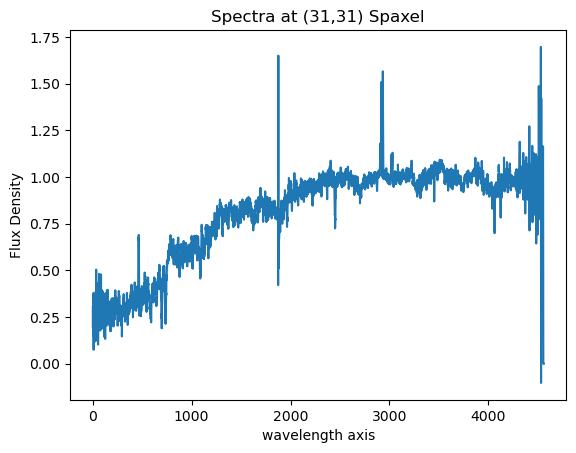

In [14]:
# extract single spaxe(x,y) spectra for whole z axis or spectral?
spec=cube[1].data  # 3d data
spec.shape
#         spec[all z axis, Y ,x]= (x,y) for full z axis
plt.plot(spec[:,31,31])
plt.title('Spectra at (31,31) Spaxel')
plt.xlabel('wavelength axis')
plt.ylabel('Flux Density')
plt.show()

In [ ]:
# extract all (x,y) spaxel spectra
for i in tqdm(range(0,62)):
    for j in tqdm(range(0,62)):
        plt.figure()
        plt.plot(spec[:,j,i])
        plt.title('Spectra at x {}, y {} Spaxel'.format(i,j))
        plt.xlabel('wavelength axis')
        plt.ylabel('Flux Density')
        plt.savefig(f'spaxel_spectra/spectra_{i}_{j}.png')
        

 32%|██████████████████████████▍                                                       | 20/62 [00:03<00:06,  6.01it/s]C:\Users\JPrakash\AppData\Local\Temp\ipykernel_1136\4104646362.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()

 10%|████████                                                                           | 6/62 [00:00<00:06,  8.29it/s]